In [114]:
#Importing Pandas library (pd)
import pandas as pd

#Uploading Dataframe (df)
df = pd.read_csv('https://raw.githubusercontent.com/pmalviyaa/schulich_data_science/main/sales_data.csv')

#View Dataframe
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [115]:
#Viewing Dataframe Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [116]:
#Viewing Summary of all columns 
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


<Axes: xlabel='Price', ylabel='Count'>

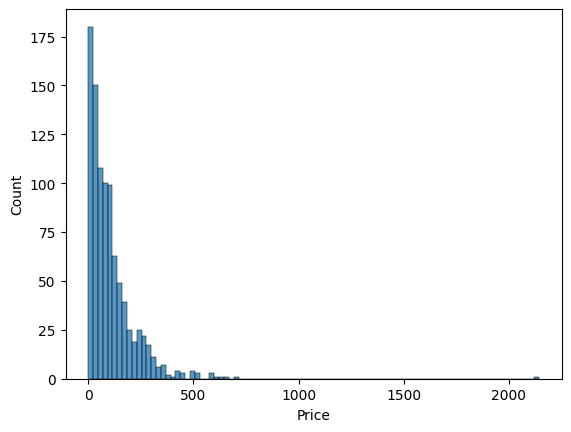

In [117]:
#Importing Packages
import seaborn as sns

#Viewing History plot 
sns.histplot(df['Price'])

In [118]:
#Filtering the data set and identifying the outlier
df[df['Price']> 2000]

,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


In [119]:
# drop the outlier
df.drop(969, axis=0, inplace=True )

<Axes: xlabel='Price', ylabel='Count'>

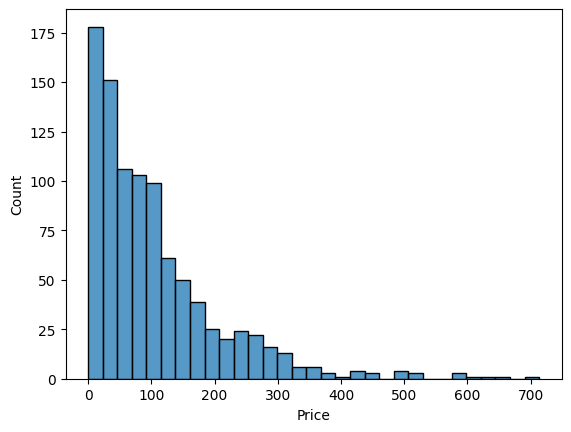

In [120]:
#Viewing History plot 
sns.histplot(df['Price'])

In [121]:
import numpy as np

In [122]:
import math 
import scipy.stats

In [126]:
dftemp= df['Price']

In [127]:
def kurtosis(dftemp):
    n = len(dftemp)
    mean = sum(dftemp) / n
    variance = sum((x - mean) ** 2 for x in dftemp) / n
    std_dev = math.sqrt(variance)
    
    kurtosis = sum((x - mean) ** 4 for x in dftemp) / (n * std_dev ** 4) - 3
    return kurtosis

In [129]:
print("dftemp Distribution: ", kurtosis(dftemp))

dftemp Distribution:  nan


In [131]:
print("dftemp Distribution (scipy): ", scipy.stats.kurtosis(dftemp, fisher=True))

dftemp Distribution (scipy):  nan


In [132]:
pip install math

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
